In [5]:
import pickle 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd


In [6]:
data_dir = Path(Path.home(), "Documents/xray/score_bench/data")
job_dir = Path(data_dir, "7mhk/20_decoys")

all_rmsds_dict = dict()
all_scores_dict = dict() 

include_native = False
scores_dfs = list() 
native_dfs = list() 
# score_files = list(job_dir.glob("scores*"))
score_files = list() 
score_files.append("/Users/matthew/Documents/xray/score_bench/data/7mhf/38_7mhf_decoys/merge_2000_7mhf_no_H20_alt_H_ions_0.csv")

for score_file in score_files:
    scores_df = pd.read_csv(score_file)
    
    scores_dfs.append(scores_df.loc[scores_df["native"] == 0])
    native_dfs.append(scores_df.loc[scores_df["native"] == 1])
    


In [7]:
n_row = 1

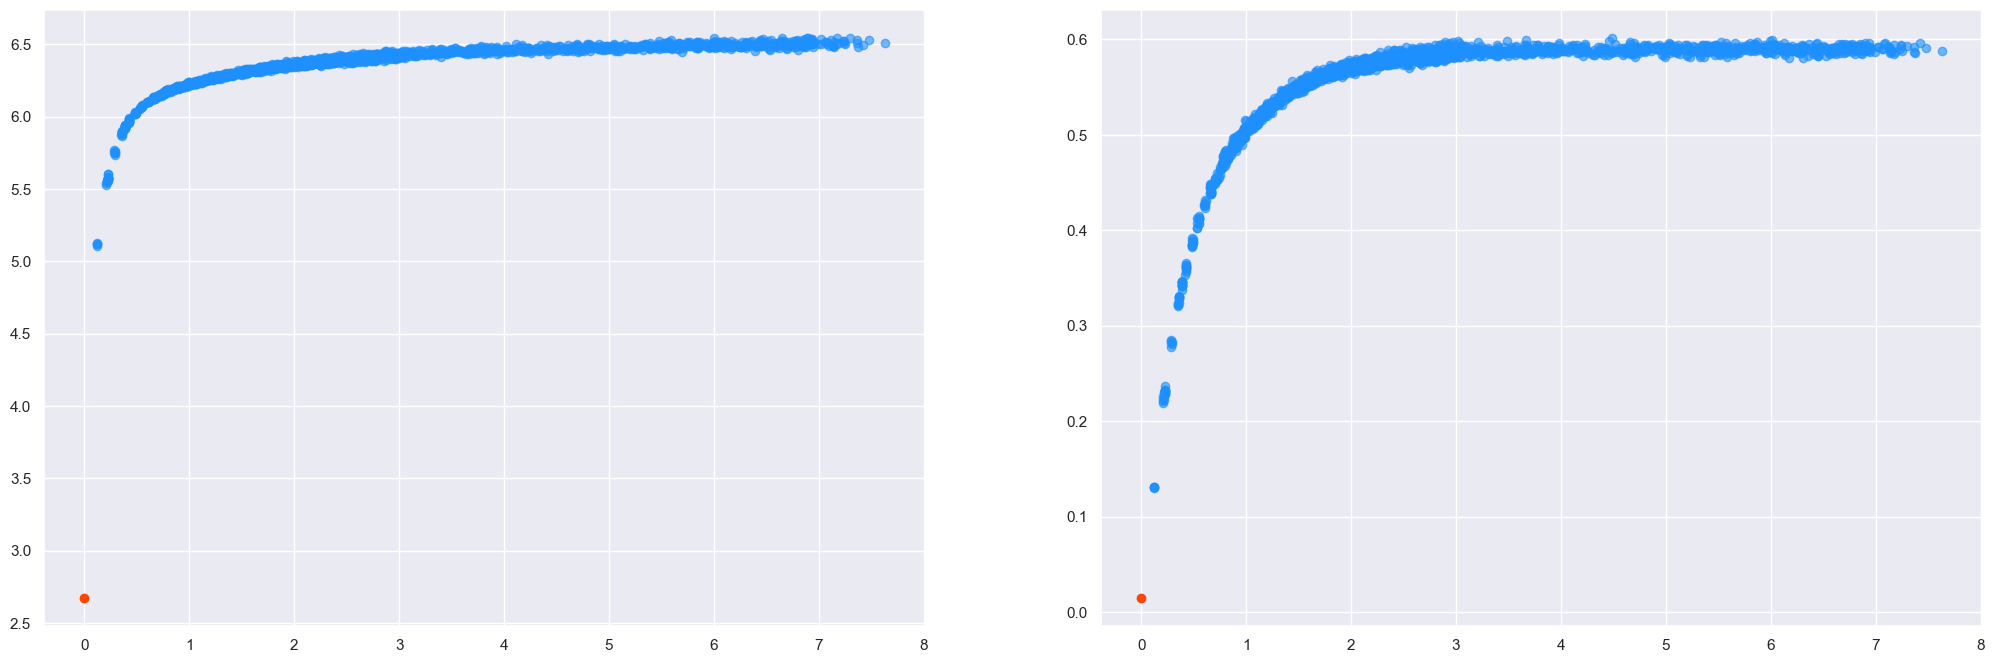

In [8]:
fig_file = Path(Path.home(), "Desktop/00_ff_x5.png")

fig, axs = plt.subplots(n_row, 2, figsize=(25,8*n_row))

colors = list() 
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha_off = .2
alpha_on = .6

custom_legend = list() 
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))

for i in range(len(scores_dfs)):
    score_df = scores_dfs[i]
    native_df = native_dfs[i]
     
    ax1_1 = axs[0]
    ax1_1.scatter(score_df["rmsd"], score_df["ml"], c=colors[0], alpha=alpha_on)
    ax1_1.scatter(native_df["rmsd"], native_df["ml"], c=colors[2])
    
    # ax1_2 = ax1_1.twinx()
    # ax1_2.scatter(score_df["rmsd"], score_df["ml"], c=colors[1], alpha=alpha_off)
    # ax1_2.scatter(native_df["rmsd"], native_df["ml"], c=colors[2], alpha=alpha_off)

    # if i < 1: 
    #     plt.legend(custom_legend, ['total', 'xray'], loc="upper right", fontsize=15)
    
    ax2_1 = axs[1]
    ax2_1.scatter(score_df["rmsd"], score_df["r_all"], c=colors[0], alpha=alpha_on)
    ax2_1.scatter(native_df["rmsd"], native_df["r_all"], c=colors[2])

    # ax2_2 = ax2_1.twinx()
    # ax2_2.scatter(score_df["rmsd"], score_df["ff"], c=colors[1], alpha=alpha_off)
    # ax2_2.scatter(native_df["rmsd"], native_df["ff"], c=colors[2], alpha=alpha_off)
    
    # if i < 1: 
    #     plt.legend(custom_legend, ['total', 'ff'], loc="upper right", fontsize=15)

# plt.savefig(fig_file)

